In [47]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.simbad import Simbad
from astropy.time import Time

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

In [48]:
def get_antisolarlon(date):
    """
    from http://aa.usno.navy.mil/faq/docs/SunApprox.php
    """
    D = date.jd - 2451545.0
    g = 357.529 + 0.98560028*D
    q = 280.459 + 0.98564736*D
    L = q + 1.915*np.sin(np.radians(g)) + 0.020*np.sin(np.radians(2*g))
    return ((L+180)%360)


In [71]:
timerange = ['2018-06-18T00:00:00', '2019-06-18T00:00:00']
t = Time(timerange, format='isot', scale='utc')
dt = t[1] - t[0]

times = t[0] + dt * np.linspace(0.,1.,365*24+1)

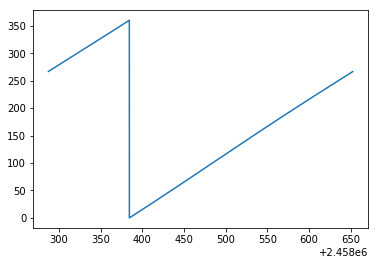

In [72]:
plt.plot(times.jd,get_antisolarlon(times))

In [73]:
f = interp1d(get_antisolarlon(times), times.jd, kind='nearest')

In [96]:
x = Time(f(25), format='jd', out_subfmt='date_hm')

In [97]:
(x + 28*u.day).iso

'2018-11-15 11:00'

TypeError: 'str' object is not callable

In [101]:
Time(2458287.5, format='jd').iso

'2018-06-18 00:00:00.000'